# Inspecting cross-sections

If deeper analysis of cross-section is required, you can enable the option `ExportCSSData` in the fm2prof project configuration file. This notebooks shows some techniques to visualise this data. 

## Loading the data

Example output is provided in the [tests directory of the fm2prof repository](https://github.com/Deltares/Fm2Prof/tree/master/tests/test_data). This is [pickled](https://docs.python.org/3/library/pickle.html) data, so we'll use `pickle` to read it. 


In [1]:
import pickle

# Cross-sections test cases
cases = ["waal_1_40147.826", "reevediep_2888.800", "veessenwapenveld_3519.948", "ketelmeer02_0.000", "twentekanaal_941.714", "nederrijn_20011.855"]

case = cases[5]

with open(fr"../../tests/test_data/cross_sections/{case}.pickle", "rb") as f:
    data = pickle.load(f)

## Visualise the cross-section input data
When unpickled, this data is a `dict` of pandas [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). The variable `data` holds all information that the `fm2prof.CrossSection` class uses to build a 1D cross-section. Let's visualise this data:

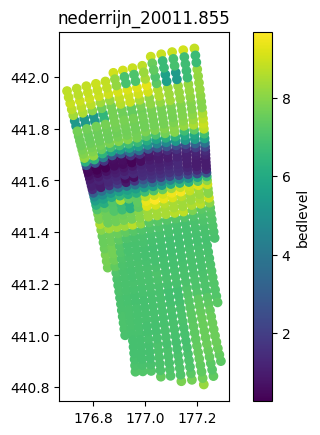

In [2]:
import matplotlib.pyplot as plt

variable = 'bedlevel'  # other variables to plot: bedlevel, section, region, area
x = data.get('fm_data').get('x')
y = data.get('fm_data').get('y')
z = data.get('fm_data').get(variable)

fig, ax = plt.subplots(1)
sc = ax.scatter(x/1000, y/1000, c=z)
ax.set_aspect('equal', adjustable='box')
ax.set_title(case)
cb = plt.colorbar(sc)
cb.set_label(variable)


## Visualising velocity

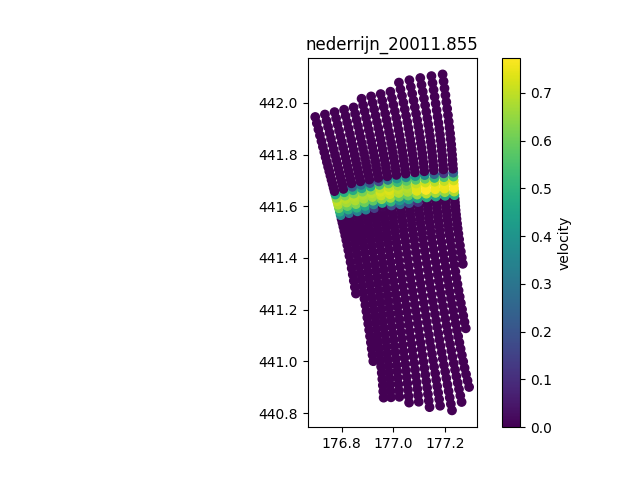

interactive(children=(IntSlider(value=6, description='i', max=46), Output()), _dom_classes=('widget-interact',…

<function __main__.update(i)>

In [6]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

variable = 'velocity' # try also: waterlevel, waterdepth

z = data.get('fm_data').get(variable)
fig, ax = plt.subplots(1)

sc = ax.scatter(x/1000, y/1000, c=z.iloc[6])
ax.set_aspect('equal', adjustable='box')
ax.set_title(case)
cb = plt.colorbar(sc)
cb.set_label(variable)
plt.show(fig)

def update(i):
    plt.gca()
    zi = z.iloc[i]
    ax.scatter(x/1000, y/1000, c=zi)
    fig.canvas.draw()

interact(update, i=widgets.IntSlider(min=0, max=46, step=1, value=6))

## Visualising conveyance
Another provided data file is the `flowmask.pickle` file. This file contains information generated during the cross-section production. The `flowmask` encodes information on which cells meet the conveyance criterium (_stroomvoeringscriterium_). 

In [7]:
with open(fr"../../tests/test_data/cross_sections/{case}_flowmask.pickle", "rb") as f:
    flowmask = pickle.load(f)

The code below visualises how this criterium is met during the 2D simulation. You'll see that as you progress in time, more cells will mee the criterium. 

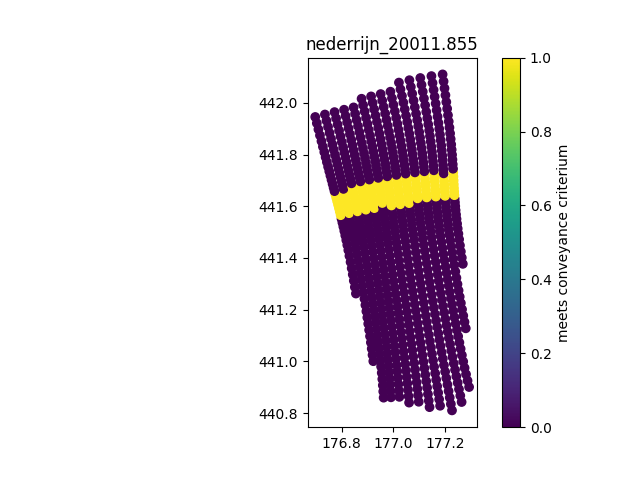

interactive(children=(IntSlider(value=6, description='i', max=46), Output()), _dom_classes=('widget-interact',…

<function __main__.update(i)>

In [8]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(1)
fm = flowmask.T.iloc[0]
sc = ax.scatter(x/1000, y/1000, c=fm)
ax.set_aspect('equal', adjustable='box')
ax.set_title(case)
cb = plt.colorbar(sc)
cb.set_label("meets conveyance criterium")
plt.show(fig)

def update(i):
    plt.gca()
    fm = flowmask.T.iloc[i]
    ax.scatter(x/1000, y/1000, c=fm)
    fig.canvas.draw()

interact(update, i=widgets.IntSlider(min=0, max=46, step=1, value=6))